In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data Understanding & Preparation

## Data Semantics
 • Introduce the variables with their meaning and characteristics;

In [3]:
df = pd.read_csv('train.csv')

In [4]:
df.head()

,originalTitle,rating,startYear,endYear,runtimeMinutes,awardWins,numVotes,worstRating,bestRating,totalImages,...,titleType,awardNominationsExcludeWins,canHaveEpisodes,isRatable,isAdult,numRegions,userReviewsTotal,ratingCount,countryOfOrigin,genres
0,Neogenic Nightmare Chapter 3: Hydro-Man,"(7, 8]",1995,\N,\N,0.0,779,1,10,1,...,tvEpisode,0,False,True,0,1,0,781,['US'],"Action,Adventure,Animation"
1,Looping,"(5, 6]",1982,\N,\N,0.0,11,1,10,1,...,videoGame,0,False,True,0,1,0,11,['XWG'],Action
2,Idealnaya para,"(5, 6]",1992,\N,\N,0.0,38,1,10,1,...,movie,0,False,True,0,1,1,38,['RU'],Comedy
3,MasterChef Celebrity México,"(5, 6]",2021,\N,\N,0.0,15,1,10,22,...,tvSeries,0,True,True,0,1,0,15,['MX'],Reality-TV
4,Seutateueob,"(7, 8]",2020,2020,80,1.0,15718,1,10,347,...,tvSeries,1,True,True,0,32,452,15746,['KR'],"Comedy,Drama,Romance"


It's analyzed a dataset about films and tv series. There are 23 variables:
- originalTitle: 		Original title, in the original language.
- runtimeMinutes: 		Primary runtime of the title, in minutes.
- isAdult: 			Whether or not the title is for adult. 0: non-adult title; 1: adult title.
- startYear: 			Represents the release year of a title. In the case of TV Series, it is the series start year.
- endYear: 			TV Series end year.
- numVotes: 			Number of votes the title has received.
- numRegions: 	 		The regions number for this version of the title.
- worstRating: 			Worst title rating.
- bestRating: 			Best title rating.
- canHaveEpisodes:		Whether or not the title can have episodes.
- isRatable: 			Whether or not the title can be rated by users.
- totalImages:			Total Number of Images for the title within the IMDb title page.
- totalVideos: 			Total Number of Videos for the title within the IMDb title page.
- totalCredits:			Total Number of Credits for the title.
- criticReviewsTotal:		Total Number of Critic Reviews.
- awardWins:			Number of awards the title won.
- awardNominationsExcludeWins: 	Number of award nominations excluding wins.
- titleType:			The type/format of the title (e.g. movie, short, tvseries, tvepisode, video, etc).
- rating:			IMDB title rating class.
- ratingCount: 			The total number of user ratings submitted for the title.
- countryOfOrigin: 		The country where the title was primarily produced.
- genres: 			The genre(s) associated with the title (e.g., drama, comedy, action).
- userReviewsTotal  		Total Number of Users Reviews.

We've chosen the following variables: (non le sceglierei da qua le variabili)


*   numVotes
*   awardWins
*   rating
*   numRegions


In [5]:
df.dtypes

originalTitle                   object
rating                          object
startYear                        int64
endYear                         object
runtimeMinutes                  object
awardWins                      float64
numVotes                         int64
worstRating                      int64
bestRating                       int64
totalImages                      int64
totalVideos                      int64
totalCredits                     int64
criticReviewsTotal               int64
titleType                       object
awardNominationsExcludeWins      int64
canHaveEpisodes                   bool
isRatable                         bool
isAdult                          int64
numRegions                       int64
userReviewsTotal                 int64
ratingCount                      int64
countryOfOrigin                 object
genres                          object
dtype: object

Analyzing the variables it can be seen that there are 4 types of variables:
- object
- integers(int64)
- floats (float64)
- booleans (bool)

It's noted that endYear is tipe object and it should be int64

## Distribution of the variables and statistics
• Explore (single, pairs of…) variables quantitatively (e.g., statistics, distributions);

In [6]:
numeric_df = df.select_dtypes(include=[np.number])

# Calcolare le statistiche descrittive
desc = numeric_df.describe().round(2)

# Calcolare il Coefficiente di Variazione (CV)
cv = (numeric_df.std() / numeric_df.mean()).round(2)
cv_df = pd.DataFrame(cv).T
cv_df.index = ['CV']

# Aggiungere il CV alle statistiche descrittive
desc = pd.concat([desc, cv_df])

desc

,startYear,awardWins,numVotes,worstRating,bestRating,totalImages,totalVideos,totalCredits,criticReviewsTotal,awardNominationsExcludeWins,isAdult,numRegions,userReviewsTotal,ratingCount
count,16431.00,13813.00,16431.00,16431.0,16431.0,16431.00,16431.00,16431.00,16431.00,16431.00,16431.00,16431.00,16431.00,16431.00
mean,1991.87,0.49,1492.15,1.0,10.0,11.48,0.27,61.34,2.79,0.56,0.03,3.55,7.23,1492.92
std,26.12,2.97,20137.71,0.0,0.0,74.25,3.12,174.02,15.41,3.96,0.16,5.85,66.50,20145.39
min,1878.00,0.00,5.00,1.0,10.0,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,5.00
25%,1978.00,0.00,15.00,1.0,10.0,1.00,0.00,16.00,0.00,0.00,0.00,1.00,0.00,15.00
50%,1997.00,0.00,36.00,1.0,10.0,1.00,0.00,34.00,0.00,0.00,0.00,1.00,0.00,36.00
75%,2013.00,0.00,148.50,1.0,10.0,6.00,0.00,65.00,1.00,0.00,0.00,3.00,2.00,149.00
max,2024.00,145.00,966565.00,1.0,10.0,3504.00,258.00,15742.00,533.00,197.00,1.00,69.00,5727.00,967042.00
CV,0.01,6.05,13.50,0.0,0.0,6.47,11.47,2.84,5.53,7.08,6.13,1.65,9.20,13.49


From the general statistics it's see that for awardWins the mean is 0.49 while the median is 0. It's highlighted that at least the 75% of units never won an award as it can be see from the value of the third quartile.  
This attribute has a low std, meaning that data are distributed near the mean.  
  
For the numVotes the average is far from the median and also from the third quartile, so there are many title with a low number of votes and some units with a lot of ratings.  
In this case, there is a very high variability, the data are distributed far from the mean.  
  
Instead, for totalCredits the mean is a bit far from the median and 75% of the title have at least 65 credits.  
The value of std is high, so the data points are widely spread out from the mean. 
  
For the total of critic and user reviews it can be see that as before the median is 0 while the mean have an higher value, so at least 50% of the films have 0 reviews. The user reviews have in mean an higher value than critic ones.  
For the first features the data are distributed near the mean more than the second features where std has a high value.  
  
The statistics of ratingCount have very similar values to numVotes. These two variables differ by a few data points.

In [28]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Creazione dei sottoplot con meno distanza
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=('awardWins', 'totalCredits', 'numVotes', 'criticReviewsTotal'),
    vertical_spacing=0.1,  # Riduce la distanza verticale
    horizontal_spacing=0.1  # Riduce la distanza orizzontale
)

# Grafico per awardWins
fig.add_trace(go.Histogram(x=df['awardWins'], nbinsx=int(50/0.9)), row=1, col=1)

# Grafico per totalCredits
fig.add_trace(go.Histogram(x=df['totalCredits'], nbinsx=int(400/2)), row=1, col=2)

# Grafico per numVotes
fig.add_trace(go.Histogram(x=df['numVotes'], nbinsx=int(400/2)), row=2, col=1)

# Grafico per criticReviewsTotal con limite sull'asse y
fig.add_trace(go.Histogram(x=df['criticReviewsTotal'], nbinsx=int(400/5)), row=2, col=2)
fig.update_yaxes(range=[0, 1500], row=2, col=2)

# Aggiornamento del layout
fig.update_layout(showlegend=False, title_text="Histograms of awardWins, totalCredits, numVotes and cirticReviewsTotal", height=800)

# Mostra il grafico
fig.show()

In this graph it is analyzed the distribution of the awards wins. It graphically supports the above assumption that at least 75% of units have never won an award.

In [10]:
primo_large = df['originalTitle'].loc[df['numVotes'] == 966565]
secondo_Nlarge = df['numVotes'].nlargest(2).iloc[-1]
secondo_large = df['originalTitle'].loc[df['numVotes'] == secondo_Nlarge]
terzo_Nlarge = df['numVotes'].nlargest(3).iloc[-1]
terzo_large = df['originalTitle'].loc[df['numVotes'] == terzo_Nlarge]
print(primo_large, 966565)
print(secondo_large, secondo_Nlarge)
print(terzo_large, terzo_Nlarge)

3655    Harry Potter and the Deathly Hallows - Part 2
Name: originalTitle, dtype: object 966565
988    Il buono, il brutto, il cattivo
Name: originalTitle, dtype: object 825934
1694    Full Metal Jacket
Name: originalTitle, dtype: object 803146


From the output code it is noticed that the first 3 units for number of votes belong to the category 'movies' of the variable 'titleType'.
These are respectively:
1. Harry Potter and the Deathly Hallows - Part 2 with 966.565 votes.
2. Il buono, il brutto, il cattivo with 825.934 votes.
3. Full Metal Jacket with 803.146 votes.

In [12]:
import plotly.express as px

# Raggruppa per titleType e isAdult e somma i premi vinti
df_grouped = df.groupby(['titleType', 'isAdult'])['awardWins'].sum().reset_index()

# Ordina il DataFrame per awardWins in ordine decrescente
df_grouped = df_grouped.sort_values(by='awardWins', ascending=False)

# Crea un bar plot usando Plotly
fig = px.bar(df_grouped, x='titleType', y='awardWins', color='isAdult', barmode='group',
             title='Sum of Award Wins by Title Type and isAdult')

# Mostra il grafico
fig.show()

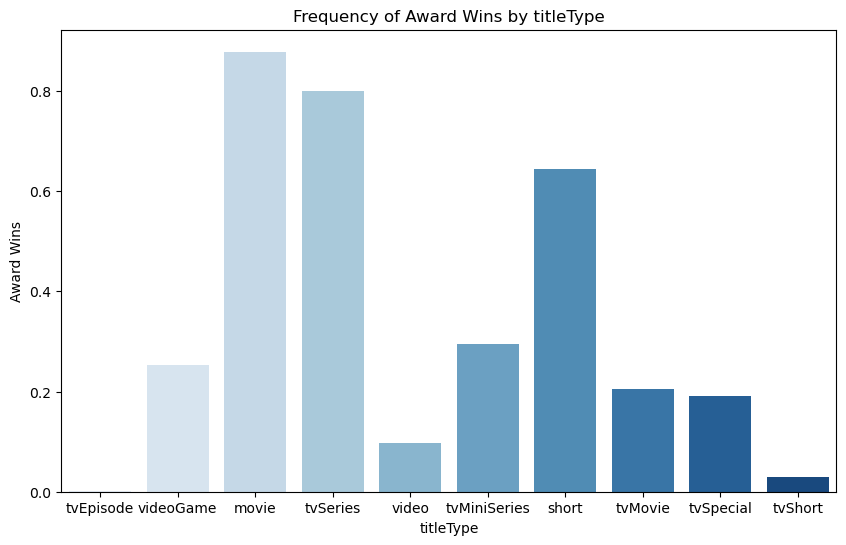

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='titleType', y='awardWins', palette='Blues', errorbar = None)

# Add title and labels
plt.title('Frequency of Award Wins by titleType')
plt.xlabel('titleType')
plt.ylabel('Award Wins')

# Show the plot
plt.show()

## Assessing data quality
• Are present errors, outliers, missing values, semantic inconsistencies, etc?

In [14]:
def variable_cleaner (variable_chosen):
    df[variable_chosen] = df[variable_chosen].replace('\\N', np.nan)

# Filtra i titoli con runtimeMinutes uguale a NaN
    prova = df.loc[df[variable_chosen].isna()]

for c in df.columns:
    variable_cleaner(c)

The '\N' values in the variables are replaced with NaN values, so that they can be counted as missing values.

In [15]:
df.isna().sum()

originalTitle                      0
rating                             0
startYear                          0
endYear                        15617
runtimeMinutes                  4852
awardWins                       2618
numVotes                           0
worstRating                        0
bestRating                         0
totalImages                        0
totalVideos                        0
totalCredits                       0
criticReviewsTotal                 0
titleType                          0
awardNominationsExcludeWins        0
canHaveEpisodes                    0
isRatable                          0
isAdult                            0
numRegions                         0
userReviewsTotal                   0
ratingCount                        0
countryOfOrigin                    0
genres                           382
dtype: int64

There are:
- 2.618 missing values in the variable 'awardWins'
- 4.852 missing values in the variable 'runtimeMinutes'
- 15.617 missing values in the variable 'endYear'
- 382 missing values in the variable 'genres'

In [16]:
'''
pd.plotting.scatter_matrix(df[['startYear', 'numVotes', 'worstRating', 'bestRating', 'totalImages',	'totalVideos', 'totalCredits','criticReviewsTotal']], figsize=(15, 15))
plt.show()
'''

"\npd.plotting.scatter_matrix(df[['startYear', 'numVotes', 'worstRating', 'bestRating', 'totalImages',\t'totalVideos', 'totalCredits','criticReviewsTotal']], figsize=(15, 15))\nplt.show()\n"

## Variable transformations
 • Is it better to use for further modules transformed variables (e.g., log-transformated)?

The ratings are given as a range (ten equally spaced intervals from one to ten). They have therefore been replaced with the mean of the range.

In [17]:
#function to calculate the interval mean
def interval_mean(value):
# Rimuove i caratteri '[' e ')' e divide usando ','
    estremi = value.replace('(', '').replace(']', '').split(',')
    minimo = float(estremi[0])
    massimo = float(estremi[1])
    # Calcola e restituisce la media
    return (minimo + massimo) / 2

# Applica la funzione alla colonna 'Intervallo' per ottenere la media
df['ratingMean'] = df['rating'].apply(interval_mean)

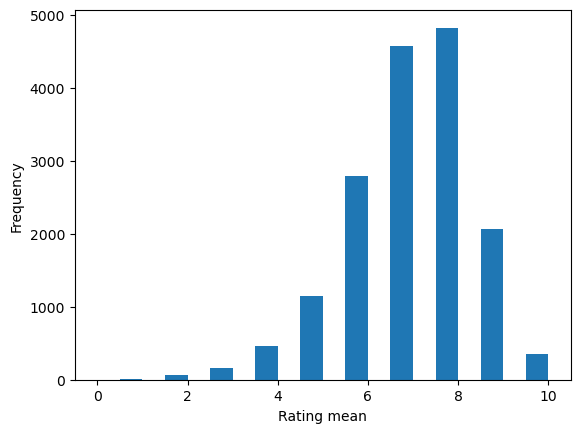

In [18]:
# Creare bin di larghezza bin_width
bin_width = 0.5
bins = np.arange(0, 10 + bin_width, bin_width)

plt.hist(df['ratingMean'], bins = bins)
plt.xlabel('Rating mean')
plt.ylabel('Frequency')
plt.show()

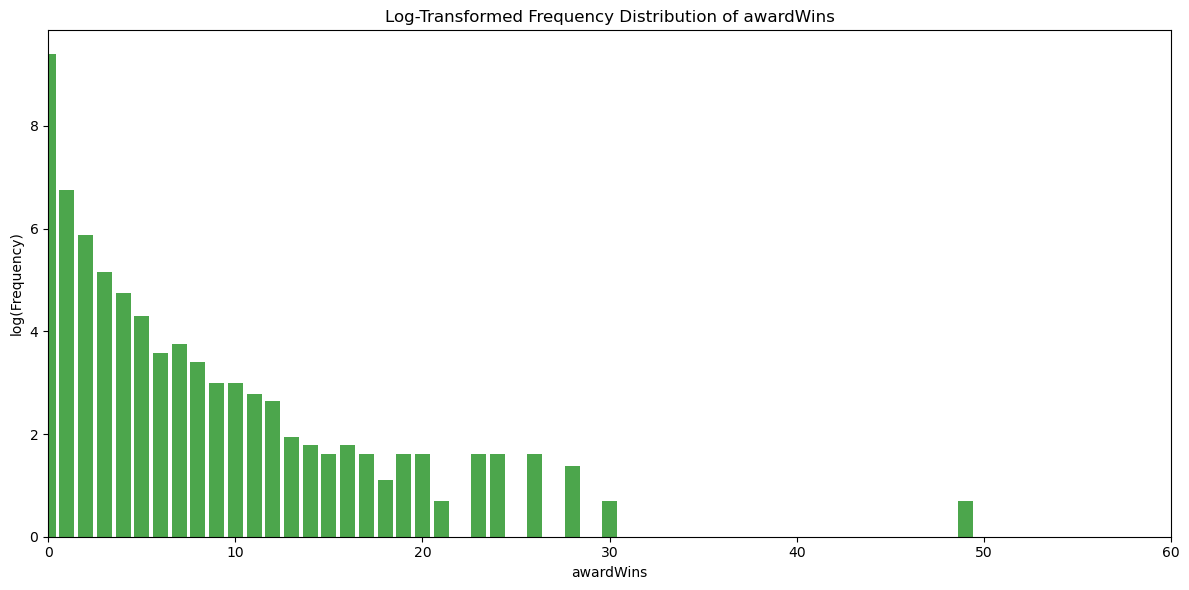

In [19]:
# Create a copy of the dataframe
df_copy = df.copy()

# Calculate the frequency of each awardWins value
frequency = df_copy['awardWins'].value_counts().sort_index()

# Apply logarithmic transformation to the frequency (adding a small constant to avoid log(0))
log_frequency = np.log(frequency + 1e-9)

# Plot the log-transformed frequency distribution
plt.figure(figsize=(12, 6))

# Log-transformed frequency distribution
plt.bar(log_frequency.index, log_frequency.values, color='green', alpha=0.7)
plt.title('Log-Transformed Frequency Distribution of awardWins')
plt.xlabel('awardWins')
plt.ylabel('log(Frequency)')
plt.xlim(0, 60)

# Show the plot
plt.tight_layout()
plt.show()

## Pairwise correlations and eventual elimination of variables
 • Matrix correlation (analyse high correlated variables)

In [20]:
df['numVotes'].corr(df['ratingCount'])

0.9999999334405569

There is a high correlation between the 'numVotes' variable and the 'ratingCount' variable. We can say that they represent the same value in the dataset, so we can eliminate one of these two variables.

In [21]:
import jinja2 as ganja
df.corr(numeric_only = True, method="pearson").style.background_gradient(cmap='Blues', vmin=-1, vmax=1)

,startYear,awardWins,numVotes,worstRating,bestRating,totalImages,totalVideos,totalCredits,criticReviewsTotal,awardNominationsExcludeWins,canHaveEpisodes,isRatable,isAdult,numRegions,userReviewsTotal,ratingCount,ratingMean
startYear,1.000000,0.076407,0.019135,nan,nan,0.013880,0.059189,0.080991,0.024758,0.077200,0.128822,nan,0.015654,-0.059845,0.019577,0.019151,0.180534
awardWins,0.076407,1.000000,0.351491,nan,nan,0.208862,0.178123,0.191245,0.361878,0.693788,0.026345,nan,-0.016394,0.281677,0.281566,0.351511,0.055754
numVotes,0.019135,0.351491,1.000000,nan,nan,0.244703,0.255338,0.244675,0.673351,0.432749,0.004030,nan,-0.011618,0.454055,0.752175,1.000000,0.037766
worstRating,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
bestRating,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
totalImages,0.013880,0.208862,0.244703,nan,nan,1.000000,0.167539,0.342938,0.253509,0.303263,0.138943,nan,-0.025093,0.288993,0.275474,0.244738,0.025370
totalVideos,0.059189,0.178123,0.255338,nan,nan,0.167539,1.000000,0.353334,0.327225,0.315425,0.066168,nan,-0.014218,0.247112,0.280888,0.255368,0.008589
totalCredits,0.080991,0.191245,0.244675,nan,nan,0.342938,0.353334,1.000000,0.253171,0.330074,0.156561,nan,-0.036051,0.264634,0.305917,0.244704,0.035868
criticReviewsTotal,0.024758,0.361878,0.673351,nan,nan,0.253509,0.327225,0.253171,1.000000,0.505829,-0.036630,nan,-0.018679,0.658574,0.645238,0.673388,-0.019724
awardNominationsExcludeWins,0.077200,0.693788,0.432749,nan,nan,0.303263,0.315425,0.330074,0.505829,1.000000,0.064031,nan,-0.016178,0.373242,0.420926,0.432813,0.041750


From this matrix it can be seen the correlation between each numeric variable in the dataset using the Pearson correlation method.

In [22]:
'''
import seaborn as sns

df_numeric = df.select_dtypes(include=[np.number])

# Se il DataFrame è molto grande, campiona un sottoinsieme più gestibile
# Imposta la dimensione del campione a un valore che il tuo sistema possa gestire, ad esempio 5 righe
df_sampled = df_numeric.sample(n=10, random_state=42)

# Calcola una matrice delle distanze (esempio di differenze assolute)
# Puoi personalizzare la metrica di distanza in base alle tue esigenze
distance_matrix = np.abs(df_sampled.values[:, np.newaxis] - df_sampled.values).sum(axis=2)


plt.figure(figsize=(50, 50), dpi= 300)
sns.heatmap(distance_matrix, annot=True, cmap='viridis', cbar=True, annot_kws={"size": 40})

plt.title('Distance Matrix Heatmap', fontsize = 90)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)


# Show the plot
plt.show()
'''

'\nimport seaborn as sns\n\ndf_numeric = df.select_dtypes(include=[np.number])\n\n# Se il DataFrame è molto grande, campiona un sottoinsieme più gestibile\n# Imposta la dimensione del campione a un valore che il tuo sistema possa gestire, ad esempio 5 righe\ndf_sampled = df_numeric.sample(n=10, random_state=42)\n\n# Calcola una matrice delle distanze (esempio di differenze assolute)\n# Puoi personalizzare la metrica di distanza in base alle tue esigenze\ndistance_matrix = np.abs(df_sampled.values[:, np.newaxis] - df_sampled.values).sum(axis=2)\n\n\nplt.figure(figsize=(50, 50), dpi= 300)\nsns.heatmap(distance_matrix, annot=True, cmap=\'viridis\', cbar=True, annot_kws={"size": 40})\n\nplt.title(\'Distance Matrix Heatmap\', fontsize = 90)\nplt.xticks(fontsize=40)\nplt.yticks(fontsize=40)\n\n\n# Show the plot\nplt.show()\n'

Idee:

- Combinated Variables

reviewsTotal = userReviewsTotal + criticReviewsTotal

awardNominations = awardWins + awardNominationsExcludeWins

- Possiamo distinguere le /N in endYear dei film e le /N delle serie tv non concluse (o degli episodi tv).

In [23]:
# Crea uno scatter plot usando Plotly
fig = px.scatter(df, x='awardWins', y='userReviewsTotal', title='Scatter Plot of Award Wins vs Critic Reviews Total')

# Mostra il grafico
fig.show()